   Salt concentration (M)  PAH chain numbers  Citrate numbers  \
0                   0.001                  1               90   
1                   0.001                  1               90   
2                   0.001                  1               90   
3                   0.001                  1               90   
4                   0.001                  1               90   

   Ligand total number  Charge density (e/nm$^2$)  $R_{\rm H}$ (nm))  \
0                  200                       -1.4               8.95   
1                  200                       -1.4               3.00   
2                  200                       -1.4               6.00   
3                  200                       -1.4               9.00   
4                  200                       -1.4              12.00   

    zeta (mV)  
0  -16.980852  
1 -102.923845  
2  -33.006531  
3  -16.809214  
4   -9.342712  


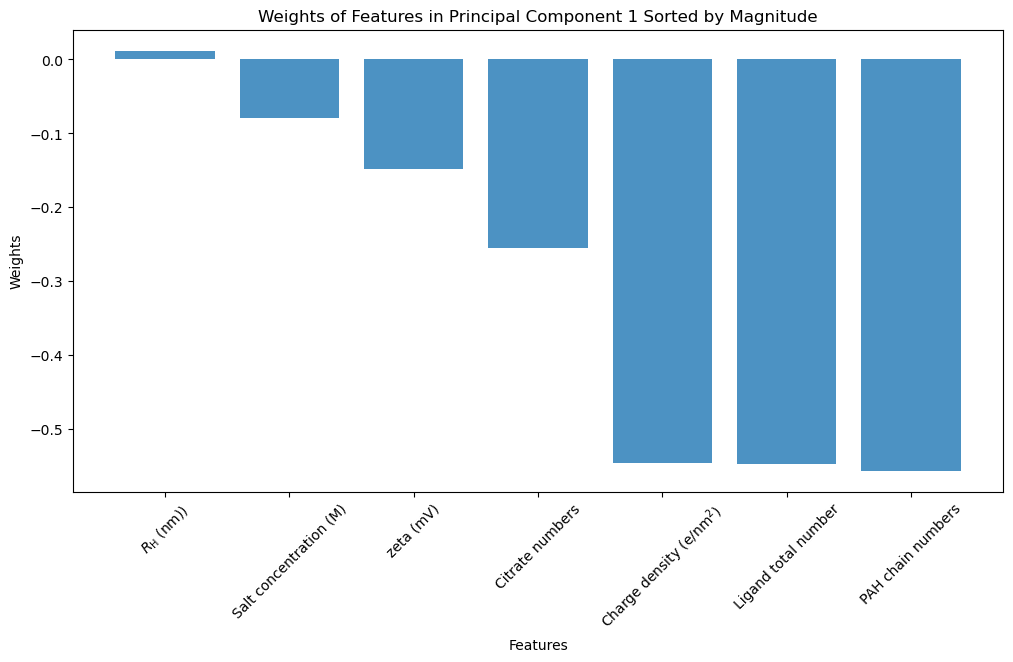

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the columns to exclude
exclude_columns = {'NP materials', 'Core Diameter (nm)', 'ligand type*'}
#,'PAH chains*','Citrate number*','Ligand number*'
# Use a lambda function to filter out unwanted columns
df = pd.read_csv('0NPzeta_new.csv', usecols=lambda column: column not in exclude_columns)
df.rename(columns={'salt concentration (M)': 'Salt concentration (M)'}, inplace=True)
df.rename(columns={'PAH chains*': 'PAH chain numbers'}, inplace=True)
df.rename(columns={'Citrate number*': 'Citrate numbers'}, inplace=True)
df.rename(columns={'Ligand number*': 'Ligand total number'}, inplace=True)
df.rename(columns={'charge density (e/nm^2)': r'Charge density (e/nm$^2$)'}, inplace=True)
df.rename(columns={'R_H (nm)': r'$R_{\rm H}$ (nm))'}, inplace=True)
df.rename(columns={'zeta (mV))': r'$\zeta$ (mV)'}, inplace=True)

# Display the first few rows to check the DataFrame
print(df.head())


# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

weights = pca.components_

weights_df = pd.DataFrame(weights, columns=df.columns) 
weights_first_component = weights_df.iloc[0]
sorted_weights = weights_first_component.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sorted_weights.index, sorted_weights, alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights of Features in Principal Component 1 Sorted by Magnitude')
plt.xticks(rotation=45)
plt.show()

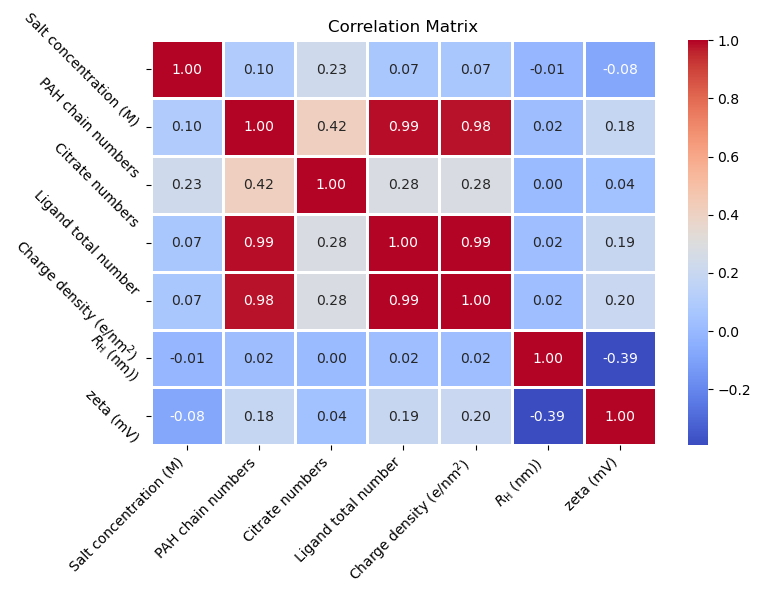

In [2]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
fig = plt.figure(figsize=(8,6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels nicely
plt.yticks(rotation=-45, ha='right')  # ha='right' aligns the labels nicely
plt.tight_layout(pad=1.0)  # 'pad' specifies the padding between the edge of the figure and the edges of subplots
#plt.minorticks_on()
#plt.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',labelsize=16)
fig.savefig('Fig_correlation_matrix.pdf')


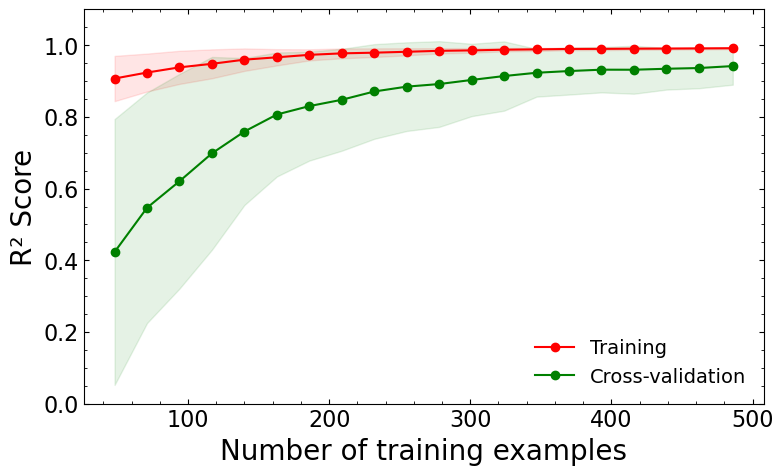

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit

# Setup the dataset
X=df.drop('zeta (mV)', axis=1)
y=df['zeta (mV)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(random_state=0)

# define the cross-validation method
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=235)

# calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, n_jobs=-1,
    train_sizes = np.linspace(0.1, 1.0, 20),
    scoring='r2'  
)

# Calculate the mean and standard deviation of the training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#### Font Sizing
#SMALL_SIZE =12
#MEDIUM_SIZE = 15
#BIGGER_SIZE = 18
SMALL_SIZE =16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#### 

# Draw the learning curve
fig = plt.figure(figsize=(8.09016, 5))
#plt.title("Random Forest Learning Curve")
plt.xlabel("Number of training examples")
plt.ylabel("R² Score")
plt.ylim(0.0, 1.1)
#plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation")
plt.minorticks_on()
plt.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',labelsize=16)

plt.legend(framealpha=0.0,loc='lower right', ncol=1)
plt.tight_layout(pad=1.0)  # 'pad' specifies the padding between the edge of the figure and the edges of subplots

#plt.show()
#fig.savefig('Fig1a.png')
#fig.savefig('Fig1a.svg')
fig.savefig('Fig_RF_learning_curve.pdf')


In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Example models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=.1,random_state=0)),
#    ('Decision Tree', DecisionTreeRegressor(random_state=0)),
    ('Random Forest', RandomForestRegressor(random_state=0)),
    ('Extra Trees', ExtraTreesRegressor(random_state=0)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=0)),
    ('AdaBoost', AdaBoostRegressor(random_state=0)),
    ('k-Nearest Neighbors', KNeighborsRegressor(n_neighbors=3)),
    ('Bayesian Ridge Regression', BayesianRidge()),
    ('SVM Regression', SVR(kernel='rbf', C=100, gamma=0.15, epsilon=0.1)),
    ('Neural Network', MLPRegressor(hidden_layer_sizes=(100,50),
    activation='relu',
    learning_rate_init=0.01,
    learning_rate='adaptive',
    max_iter=1000,
    random_state=0)),
    ('XGBoost', XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=2,learning_rate=0.16,random_state=0))
]

# Read the CSV file
df = pd.read_csv('0NPzeta_new.csv')

# Separate the features and target
X = df.drop("zeta (mV)", axis=1)
y = df["zeta (mV)"]

# Preprocessing for numerical data: imputation
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data: imputation + one hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, X.select_dtypes(include=['object']).columns)
    ])

# Results storage
results = {name: {'MSE': [], 'R2': []} for name, _ in models}

# Evaluate each model
for name, model in models:
    for seed in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        # Create a full pipeline which includes preprocessing and the model
        full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', model)])
        full_pipeline.fit(X_train, y_train)
        y_pred = full_pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name]['MSE'].append(mse)
        results[name]['R2'].append(r2)

# Prepare DataFrame to store averaged results and standard deviations
ave_results = pd.DataFrame(columns=['Model Name', 'Average MSE', 'MSE Stdev', 'Average R2', 'R2 Stdev'])

# Calculate average MSE, MSE standard deviation, average R2, and R2 standard deviation for each model and store in DataFrame
for name in results:
    average_mse = np.mean(results[name]['MSE'])
    stdev_mse = np.std(results[name]['MSE'])
    average_r2 = np.mean(results[name]['R2'])
    stdev_r2 = np.std(results[name]['R2'])
    new_row = pd.DataFrame({
        'Model Name': [name],
        'Average MSE': [average_mse],
        'MSE Stdev': [stdev_mse],
        'Average R2': [average_r2],
        'R2 Stdev': [stdev_r2]
    })
    ave_results = pd.concat([ave_results, new_row], ignore_index=True)

# Print and save the DataFrame
print(ave_results)
ave_results.to_csv('averaged_model_results_with_stdev.csv', index=False)

                   Model Name  Average MSE   MSE Stdev  Average R2  R2 Stdev
0           Linear Regression  1840.880153  274.644029    0.185900  0.079212
1            Ridge Regression  1836.885561  277.169892    0.187996  0.077501
2               Random Forest   171.304307  135.350084    0.918009  0.068015
3                 Extra Trees   110.169152   91.608909    0.946726  0.048018
4           Gradient Boosting   150.279045  111.951007    0.926776  0.062261
5                    AdaBoost   387.312878  184.126675    0.824866  0.080918
6         k-Nearest Neighbors   681.433082  228.585760    0.705368  0.069693
7   Bayesian Ridge Regression  1869.859105  297.789112    0.174904  0.073928
8              SVM Regression   794.518326  194.609185    0.649446  0.075676
9              Neural Network   767.101535  256.192984    0.647735  0.150731
10                    XGBoost   417.124916  303.461024    0.797370  0.161267


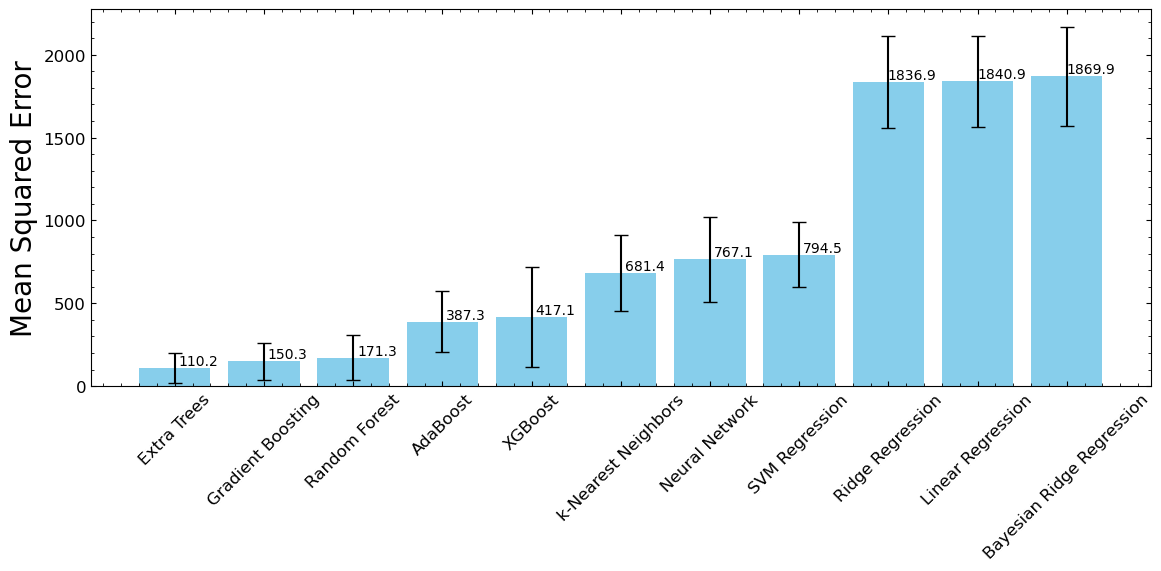

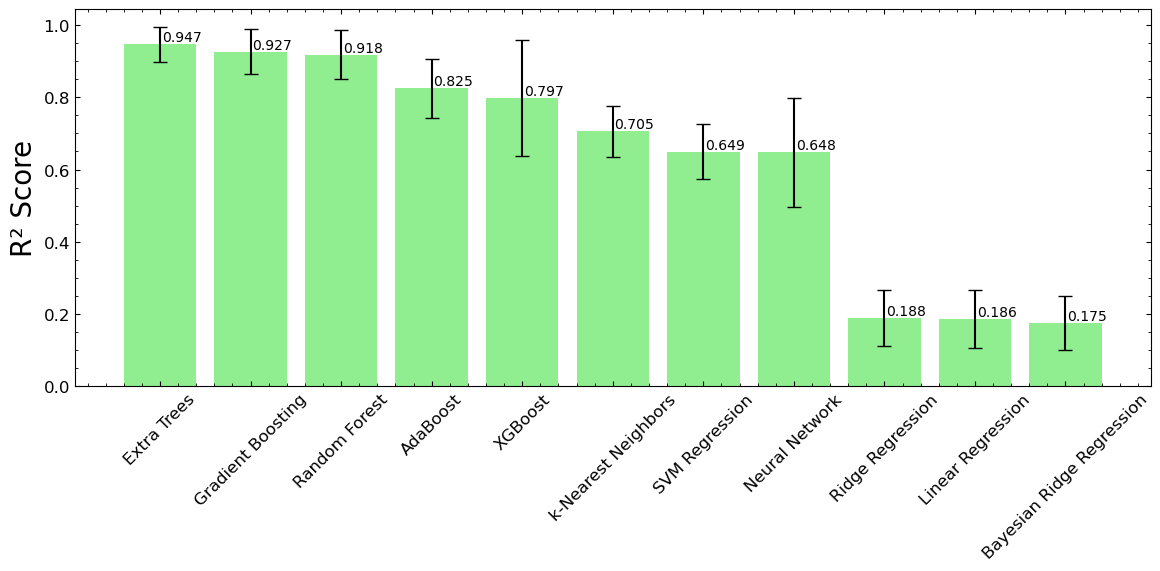

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming ave_results is loaded with Average MSE, MSE Stdev, Average R2, and R2 Stdev columns
ave_results = pd.read_csv('averaged_model_results_with_stdev.csv')

# Sort the results by MSE and R² Score
sorted_by_mse = ave_results.sort_values('Average MSE')
sorted_by_score = ave_results.sort_values('Average R2', ascending=False)

# Plot MSE histogram with error bars
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(sorted_by_mse['Model Name'], sorted_by_mse['Average MSE'], yerr=sorted_by_mse['MSE Stdev'], 
              color='skyblue', capsize=5)
#ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
#ax.set_title('Comparison of Mean Squared Error Across Models')
ax.set_xticks(range(len(sorted_by_mse['Model Name'])))  # Ensure correct placement of labels
ax.set_xticklabels(sorted_by_mse['Model Name'], rotation=45)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/1.2, yval, round(yval, 1), va='bottom', ha='center',fontsize=10)
ax.minorticks_on()
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',labelsize=12)

plt.tight_layout()
plt.show()
fig.savefig('MSE_with_error_bars.pdf')

# Plot R² Score histogram with error bars
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(sorted_by_score['Model Name'], sorted_by_score['Average R2'], yerr=sorted_by_score['R2 Stdev'],
              color='lightgreen', capsize=5)
#ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
#ax.set_title('Comparison of R² Score Across Models')
ax.set_xticks(range(len(sorted_by_score['Model Name'])))  # Ensure correct placement of labels
ax.set_xticklabels(sorted_by_score['Model Name'], rotation=45)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/1.25, yval, round(yval, 3), va='bottom', ha='center',fontsize=10)
ax.minorticks_on()
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',labelsize=12)

plt.tight_layout()
plt.show()
fig.savefig('R2_with_error_bars.pdf')


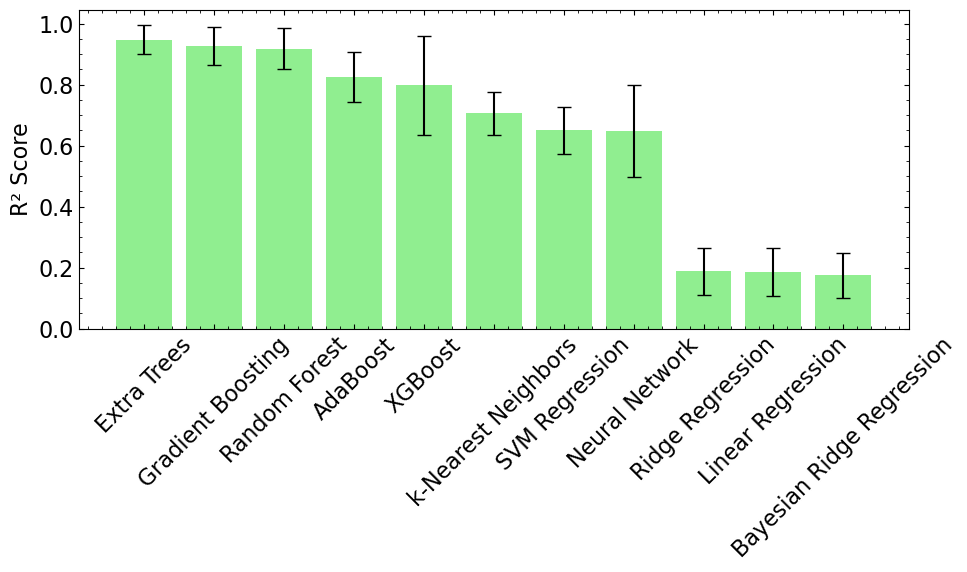

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Font Sizing
#SMALL_SIZE =12
#MEDIUM_SIZE = 15
#BIGGER_SIZE = 18
SMALL_SIZE =16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
#### 

# Assuming ave_results is loaded with Average MSE, MSE Stdev, Average R2, and R2 Stdev columns
ave_results = pd.read_csv('averaged_model_results_with_stdev.csv')

# Sort the results by MSE and R² Score
sorted_by_mse = ave_results.sort_values('Average MSE')
sorted_by_score = ave_results.sort_values('Average R2', ascending=False)

# Plot R² Score histogram with error bars
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(sorted_by_score['Model Name'], sorted_by_score['Average R2'], yerr=sorted_by_score['R2 Stdev'],
              color='lightgreen', capsize=5)
#ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
#ax.set_title('Comparison of R² Score Across Models')
ax.set_xticks(range(len(sorted_by_score['Model Name'])))  # Ensure correct placement of labels
ax.set_xticklabels(sorted_by_score['Model Name'], rotation=45)
#for bar in bars:
#    yval = bar.get_height()
#    ax.text(bar.get_x() + bar.get_width()/1.1, yval, round(yval, 2), va='bottom', ha='center')
ax.minorticks_on()
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',labelsize=16)

plt.tight_layout()
plt.show()

fig.savefig('Fig_model_compare.pdf')


In [7]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import joblib

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file
df = pd.read_csv('0NPzeta_new.csv')

# Separate the features and target
X = df.drop("zeta (mV)", axis=1)
y = df["zeta (mV)"]

# Preprocessing for numerical data: imputation
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data: imputation + one hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_transformer, X.select_dtypes(include=['object']).columns)
    ])

# Define the model as ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=0)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# Define the parameter grid to search
param_grid = {
    'model__n_estimators': [100, 200, 300],  # Adjusted for ExtraTrees
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],  # Added parameter for finer control
    'model__bootstrap': [True, False]  # ExtraTrees specific parameter
}

# Create a grid search object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Predict the target variable for the test data using the best estimator
y_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the score of the model on the test data
score = best_model.score(X_test, y_test)
print("Score:", score)

# Save the best model
joblib.dump(best_model, 'et_best.pkl')


Mean Squared Error: 34.300970333525925
Score: 0.9856039762862661


['et_best.pkl']

-2.8973793822629674

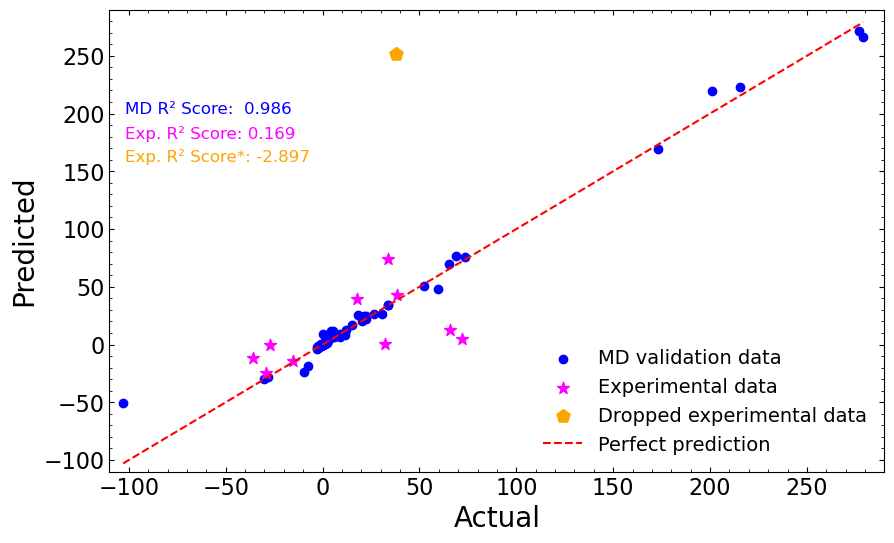

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Font Sizing
#SMALL_SIZE =12
#MEDIUM_SIZE = 15
#BIGGER_SIZE = 18
SMALL_SIZE =16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#### 

df_exp = pd.read_csv('0NPzeta_experiment_mod.csv')

# Make predictions using the best model
df_exp = df_exp.drop(index=4) # Drop the row with worst point
y_pred_exp = best_model.predict(df_exp.drop('zeta (mV)', axis=1, errors='ignore'))
y_actual_exp = df_exp['zeta (mV)']

# Calculate the MSE and score if actual values exist
mse_exp = mean_squared_error(y_actual_exp, y_pred_exp)
score_exp = best_model.score(df_exp.drop('zeta (mV)', axis=1), y_actual_exp)

#no drop
df_exp_no_drop = pd.read_csv('0NPzeta_experiment_mod.csv')
y_pred_exp_no_drop = best_model.predict(df_exp_no_drop.drop('zeta (mV)', axis=1, errors='ignore'))
y_actual_exp_no_drop = df_exp_no_drop['zeta (mV)']

score_exp_no_drop = best_model.score(df_exp_no_drop.drop('zeta (mV)', axis=1), y_actual_exp_no_drop)

#fig = plt.figure(figsize=(8.09016, 5))
fig = plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='MD validation data')
plt.scatter(y_actual_exp, y_pred_exp, color='magenta', label='Experimental data',marker='*',s=80)
plt.scatter(y_actual_exp_no_drop[4], y_pred_exp_no_drop[4], color='orange', label='Dropped experimental data', marker='p',s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(-110,290)
plt.ylim(-110,290)
plt.minorticks_on()
plt.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both',labelsize=16)
plt.legend(framealpha=0.0,loc='lower right', ncol=1)
#plt.text(0.02, 0.80, f'MD R² Score:    {score:.3f} \nExp. R² Score:  {score_exp:.3f} \nExp. R² Score*:{score_exp_no_drop:.3f}', transform=plt.gca().transAxes, va='top')
#Add text annotation with alignment
plt.text(0.02, 0.80, f'MD R² Score:  {score:.3f}', 
         transform=plt.gca().transAxes, 
         va='top', ha='left',  # Vertical and Horizontal Alignment
         fontsize=12, color='blue')  # Additional styling options
plt.text(0.02, 0.75, f'Exp. R² Score: {score_exp:.3f}', 
         transform=plt.gca().transAxes, 
         va='top', ha='left',  # Vertical and Horizontal Alignment
         fontsize=12, color='magenta')  # Additional styling options
plt.text(0.02, 0.70, f'Exp. R² Score*: {score_exp_no_drop:.3f}', 
         transform=plt.gca().transAxes, 
         va='top', ha='left',  # Vertical and Horizontal Alignment
         fontsize=12, color='orange')  # Additional styling options
#plt.show()
#fig.savefig('Fig1a.png')
#fig.savefig('Fig1a.svg')
fig.savefig('Fig_Extra_Trees.pdf')
score_exp_no_drop

In [9]:
y_pred_exp_no_drop

array([ 4.36469052e+00,  1.28243148e+01,  4.31660003e+01, -1.12342333e+01,
        2.51547382e+02,  1.64501628e-01, -2.42882695e+01,  1.15809430e-03,
       -1.40435524e+01,  3.95361935e+01,  7.37785142e+01])

In [10]:
y_actual_exp_no_drop

0     72.0
1     66.0
2     38.4
3    -36.0
4     38.0
5     32.0
6    -29.0
7    -27.0
8    -15.3
9     17.9
10    34.0
Name: zeta (mV), dtype: float64